In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로딩
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

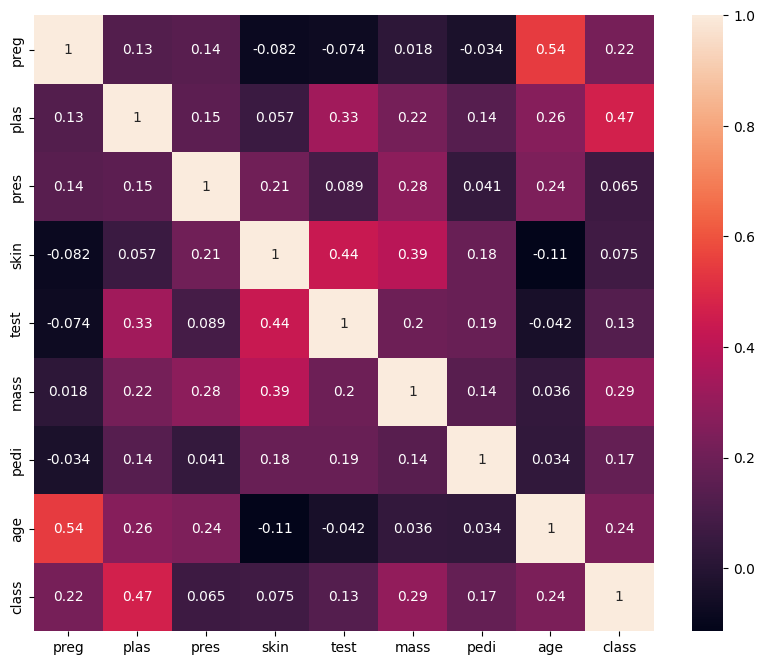

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)
model.summary()  # 모델이 잘 만들어졌는지 확인
# Param은?
# 입력층은 8개의 뉴런, 출력층은 12개의 뉴런을 가짐
# 첫 Dense Layer에서 각 입력 뉴런은 12개의 출력 뉴런과 연결되어 있으므로, 8 X 12 = 96 + bias(12) = 108
# 두번째 Dense Layer에서 각 입력 뉴런은 8개의 출력 뉴런과 연결되어 있으므로, 12 X 8 = 96 + bias(8) = 104
# 출력 Layer에서 각 입력 뉴련은 1개의 출력 뉴련과 연결되어 있으므로, 8 X 1 = 8 + bias(1) = 9

Epoch 1/150
62/62 [==============================] - 1s 3ms/step - loss: 0.6560 - accuracy: 0.6270
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5996 - accuracy: 0.6987
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7199
Epoch 4/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7443
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7476
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7638
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7671
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7655
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.7687
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.7687
Epoch 11/

중요변수 추출

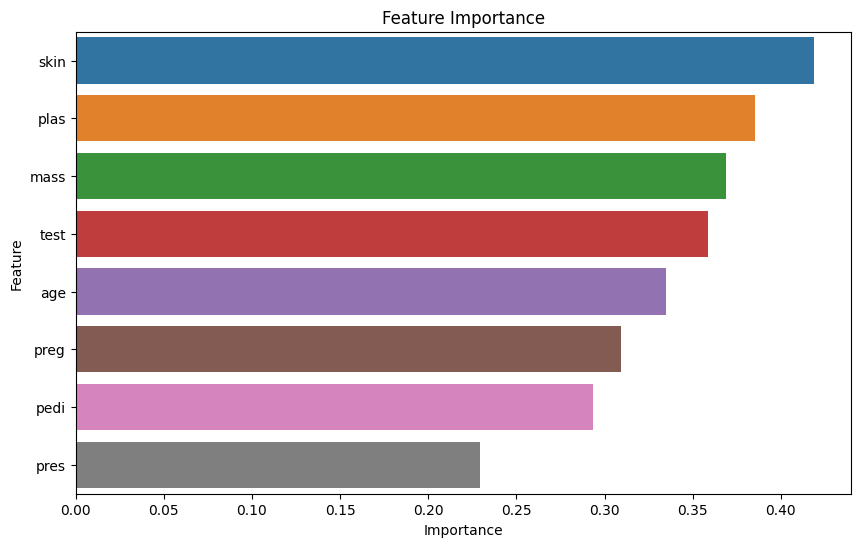

,Feature,Importance
3,skin,0.418687
1,plas,0.385616
5,mass,0.368813
4,test,0.358959
7,age,0.335116
0,preg,0.309267
6,pedi,0.293338
2,pres,0.229493


In [7]:
import numpy as np

# 첫 번째 레이어의 가중치 추출
weights = model.layers[0].get_weights()[0]

# 각 입력 변수에 대한 중요도 계산
importances = np.mean(np.abs(weights), axis=1)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'],
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame and plot the importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

importance_df

이렇게 첫 번째 레이어의 가중치만을 사용하는 이유는 여러 가지가 있습니다:

1. **직관성**: 첫 번째 레이어는 입력 변수와 직접적으로 연결되어 있습니다. 따라서 이 레이어의 가중치는 입력 변수가 중간 레이어나 출력에 얼마나 영향을 미치는지에 대한 직관적인 정보를 제공할 수 있습니다.
-> 두 번째 레이어의 값은 출력에 가까운 형태로 변화됨</br>
-> 첫 번째 레이어의 값을 기억하지 못함
2. **단순성**: 첫 번째 레이어만 고려하면 계산이 간단해집니다. 전체 네트워크의 중요도를 계산하는 것은 복잡하고, 정확한 방법도 명확하지 않습니다.
3. **시각화의 용이성**: 첫 번째 레이어의 가중치만을 사용하면, 각 입력 변수에 대한 중요도를 쉽게 시각화하고 해석할 수 있습니다.

그러나 이 방법은 몇 가지 단점이 있습니다:

1. **정보 손실**: 첫 번째 레이어의 가중치만을 사용하면, 나머지 레이어의 정보는 완전히 무시됩니다. 신경망의 나머지 부분에서 일어나는 복잡한 상호 작용과 변환은 고려되지 않습니다.
2. **정확도 부족**: 이 방법은 대략적인 중요도만을 제공하며, 정확한 중요도는 아닙니다.

이와 같이 대략적으로 변수의 중요도를 볼 수는 있다.

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

5/5 [==============================] - 1s 16ms/step - loss: 0.5886 - accuracy: 0.7208
Test Accuracy: 72.08%


---

다중 분류

In [9]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [10]:
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [11]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [15]:
X = data.drop('species', axis=1)
y = data['species']

In [16]:
# 원-핫 인코딩
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


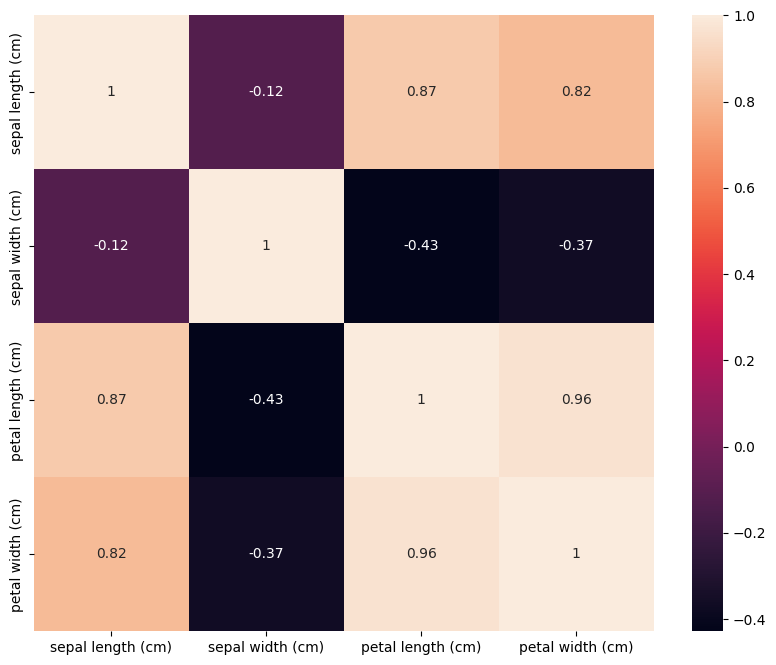

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# 모델 구성
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3개의 클래스이므로 3개의 출력 뉴런

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
12/12 [==============================] - 1s 2ms/step - loss: 1.2006 - accuracy: 0.1000
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 1.1647 - accuracy: 0.1000
Epoch 3/150
12/12 [==============================] - 0s 3ms/step - loss: 1.1360 - accuracy: 0.1250
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 1.1113 - accuracy: 0.1583
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0932 - accuracy: 0.2250
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0769 - accuracy: 0.3083
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0616 - accuracy: 0.3417
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0399 - accuracy: 0.3333
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0154 - accuracy: 0.3583
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 0.9871 - accuracy: 0.3667
Epoch 11/

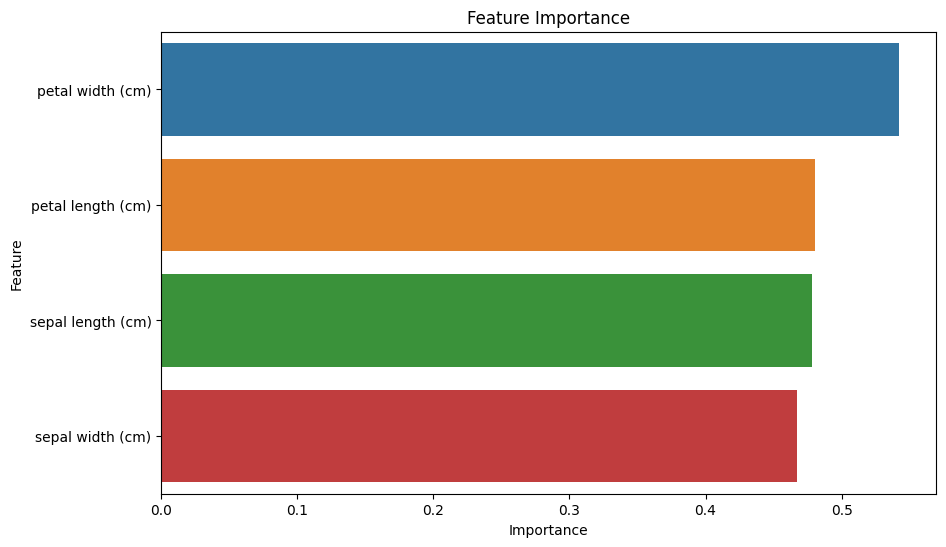

In [20]:
# 첫 번째 레이어의 가중치 추출
weights = model.layers[0].get_weights()[0]

# 각 입력 변수에 대한 중요도 계산
importances = np.mean(np.abs(weights), axis=1)

# 중요도 시각화
importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

In [21]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 249ms/step - loss: 0.0375 - accuracy: 1.0000
Test Accuracy: 100.00%
